# Week 11 Tutorial: Classes and Object-oriented Programming

POP77001 Computer Programming for Social Scientists

## Recap: Class definition

-   Let us recap how a class can be defined in Python.
-   Look at the mock class definition below.
-   Check that you understand what every part of it is.
-   Create an instance of the class.
-   Make sure that you can access docstrings for both class and
    individual methods.

## 

``` python
class MyClass(object):
    """Docstring describing the class.""" 
    # Use docstrings rather than comments to document
    # both the class and its individual methods
    # docstrings can be accessed interactively using help()
    # function. While comments would require going back to
    # source code.
    
    # Special Method for object instantiation - always first
    def __init__(self, var):
        """Create a new instance of class."""
        # Methods with two underscores ("__") serve special purposes.
        # E.g. __init__() is a constructor method that creates 
        # an instance of the class. 
        #
        # `self` refers to a specific instance of the class.
        # Then data fields can be described using `self.` prefix
        self.var = var
    
    # Special Method for object string representation
    def __str__(self): 
        """Return a string representation of object."""
        # Define here how you want an instance of the classto be printed. 
        return str(self.var)
    
    def class_method(self, arg):
        """Docstring describing the method."""
        # Some method that does something.
        pass
```

## Class Definition: Example

-   Let us come back to the `StatisticalTest` base class from the
    lecture.
-   Check that you understand what each of the lines of code does.
-   Try creating and manipulating the objects of this class.

## 

``` python
class StatisticalTest:
    """Base class for Statistical tests"""
    def __init__(self, x, y = None, test_name = None):
        """
        Initialize the StatisticalTest.
    
        Parameters:
          - x: The first sample for the test.
          - y: The second sample for tests that compare two samples (default is None).
          - test_name: The name of the test as string (default is None).
        """
        self.x = x
        self.y = y
        self.test_name = test_name
        self.test_statistic = None
        self.p_value = None
    def __str__(self):
        """Return a string representation of the statistical test."""
        return f'{self.test_name}\n' \
               f'Test statistic: {self.test_statistic}\n' \
               f'P-value: {self.p_value}'
    def test(self):
        """
        Conduct the statistical test.

        This method performs the necessary calculations
        to obtain the test statistic and p-value based
        on the provided samples.

        Important: This method must be implemented in subclasses.
        """
        raise NotImplementedError
```

## Exercise: Creating Methods

-   Note that there only one method designed to be explicitly called by
    a user.
-   It is the method for conducting a test.
-   Note that the results of the test are stored in the object itself.
-   We can access them by calling the object’s attributes.
-   However, in OOP paradigm it is also common to have methods retrieve
    object attributes for us (see `get_age()` method for `Tamagotchi`
    class from the lecture).
-   Implement a method called `get_results()` that returns the test
    results as a dictionary.
-   Try out a new class design.

## `StatisticalTest` and Subclasses

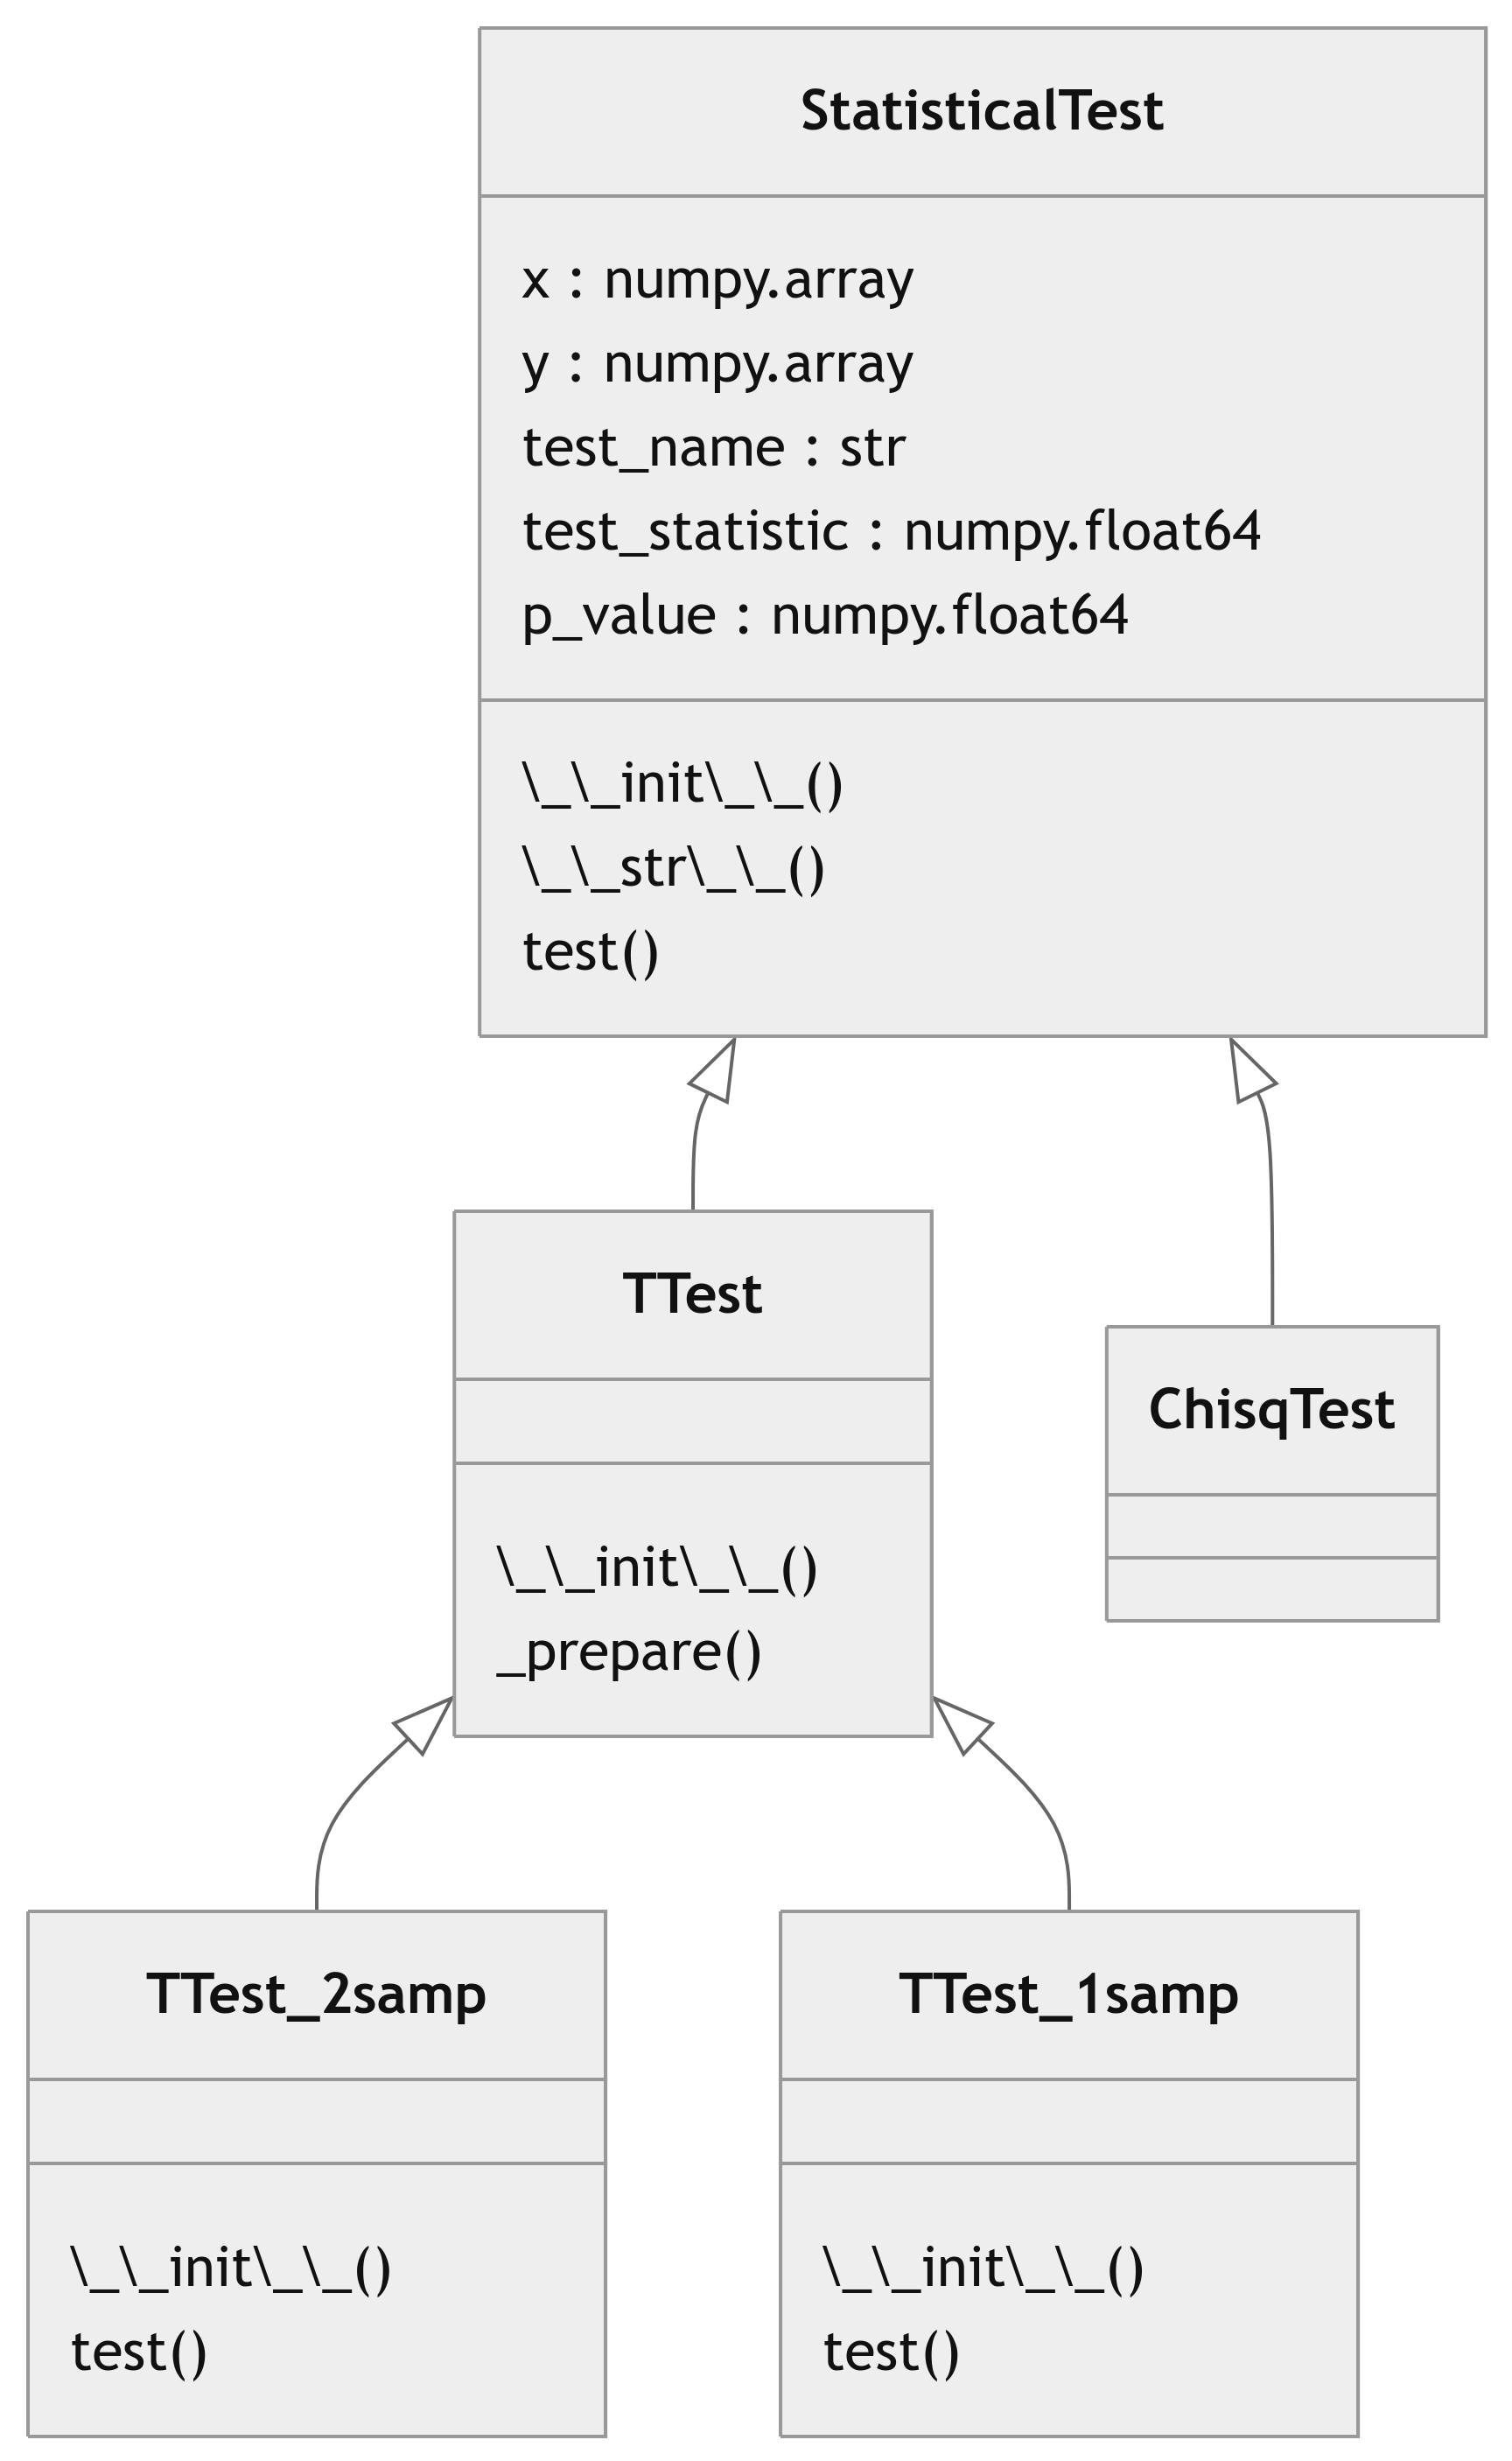

## Exercise: Inheritance Hierarchy

-   In the lecture we further implemented classes `TTest` and
    `TTest_2samp` as subclasses of `StatisticalTest`.
-   We sketched a possible `TTest_1samp` class, but have not implemented
    it.
-   Below you will find a function `ttest_1samp()` that performs a
    one-sample t-test.
-   Implement a class `TTest_1samp` that inherits from `TTest` and
    conducts a one-sample t-test.
-   Create an object of this class and conduct a test.
-   Extra: compare the results and workflow with the built-in `t.test()`
    function in R.

## 

``` python
import numpy as np
from scipy.stats import t

def ttest_1samp(x, mean_null = 0):
    """
    Perform two-sided one-sample t-test.

    Parameters:
      - x: The sample for the test.
      - mean_null: The null hypothesis value (default is 0).

    Returns:
      - res: A dictionary containing the results of the test.  
    """
    # Ensure x is NumPy array
    x = np.array(x)
    mean_x = np.mean(x)
    # Use ddof = 1 for sample variance in Python
    var_x = np.var(x, ddof = 1)
    n_x = len(x)
    se_x = np.sqrt(var_x / n_x)
    # Calculate the t-statistic
    t_stat = (mean_x - mean_null) / se_x
    # Calculate the degrees of freedom
    df = n_x - 1
    # Calculate the p-value
    p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    # Create a result dictionary
    res = {
        't_statistic': t_stat,
        'p_value': p_val
    }
    return res
```

. . .

``` python
ttest_1samp([-1, 0, 2, 3, 5])
```

    {'t_statistic': 1.6858544608470492, 'p_value': 0.16710331573259807}

## Week 11: Assignment 4

-   Data Wrangling in Python and Classes
-   Due by 12:00 on Monday, 1st December